Python environment

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as pl

In [ ]:
sc.set_figure_params(dpi=100, dpi_save = 300, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.9.0.dev1+g87396a8 anndata==0.7.5 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.2


In [ ]:
sc.settings.n_jobs = 8

In [ ]:
sc.set_figure_params(dpi=100, dpi_save = 300, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()
pl.rcParams['pdf.fonttype'] = 42
sc.settings.figdir = 'figures'

scanpy==1.9.0.dev1+g87396a8 anndata==0.7.5 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.2


In [ ]:
adata = sc.read('data/core_GBmap.h5ad')

In [ ]:
adata = adata[adata.obs['cell_type'].isin(['Mural cell','Endothelial'])].copy()

In [ ]:
metadata = pd.read_csv('data/celltype_atlas_vascular.csv', index_col=0)
adata.obs['cell_type_vascular'] = metadata['celltype_atlas'].values

### Visualization of marker genes using scanpy

In [ ]:
adata.obs['cell_type_vascular'].cat.reorder_categories(
    ['Endo capilar', 'Endo arterial', 'Tip-like',  # endo
     'SMC', 'Pericyte', 
     'SMC prolif',
     'SMC COL',
     'Scavenging endothelial','Scavenging pericyte',
     'Perivascular fibroblast', 'VLMC'], inplace=True)

In [ ]:
marker_genes_dict = {
                     'Capilar': ['CLDN5', 'SLC39A10'],
                     'Arterial': ['TM4SF1', 'PLVAP'], 
                     'Tip': ['FLT4', 'NOX4'],
                     'SMC': ['TAGLN', 'MYL9'],
                     'Peri': ['ENPEP', 'EDNRA'],
                     'Prolif': ['CDK1', 'TOP2A'],
                     'Col': ['COL5A1', 'TNC'],
                     'Scav': ['CCL4L2', 'HLA-DRA'],
                     'PF': ['C7', 'APOD'],
                     'VLMC': ['PTGDS', 'SLN'],
                }

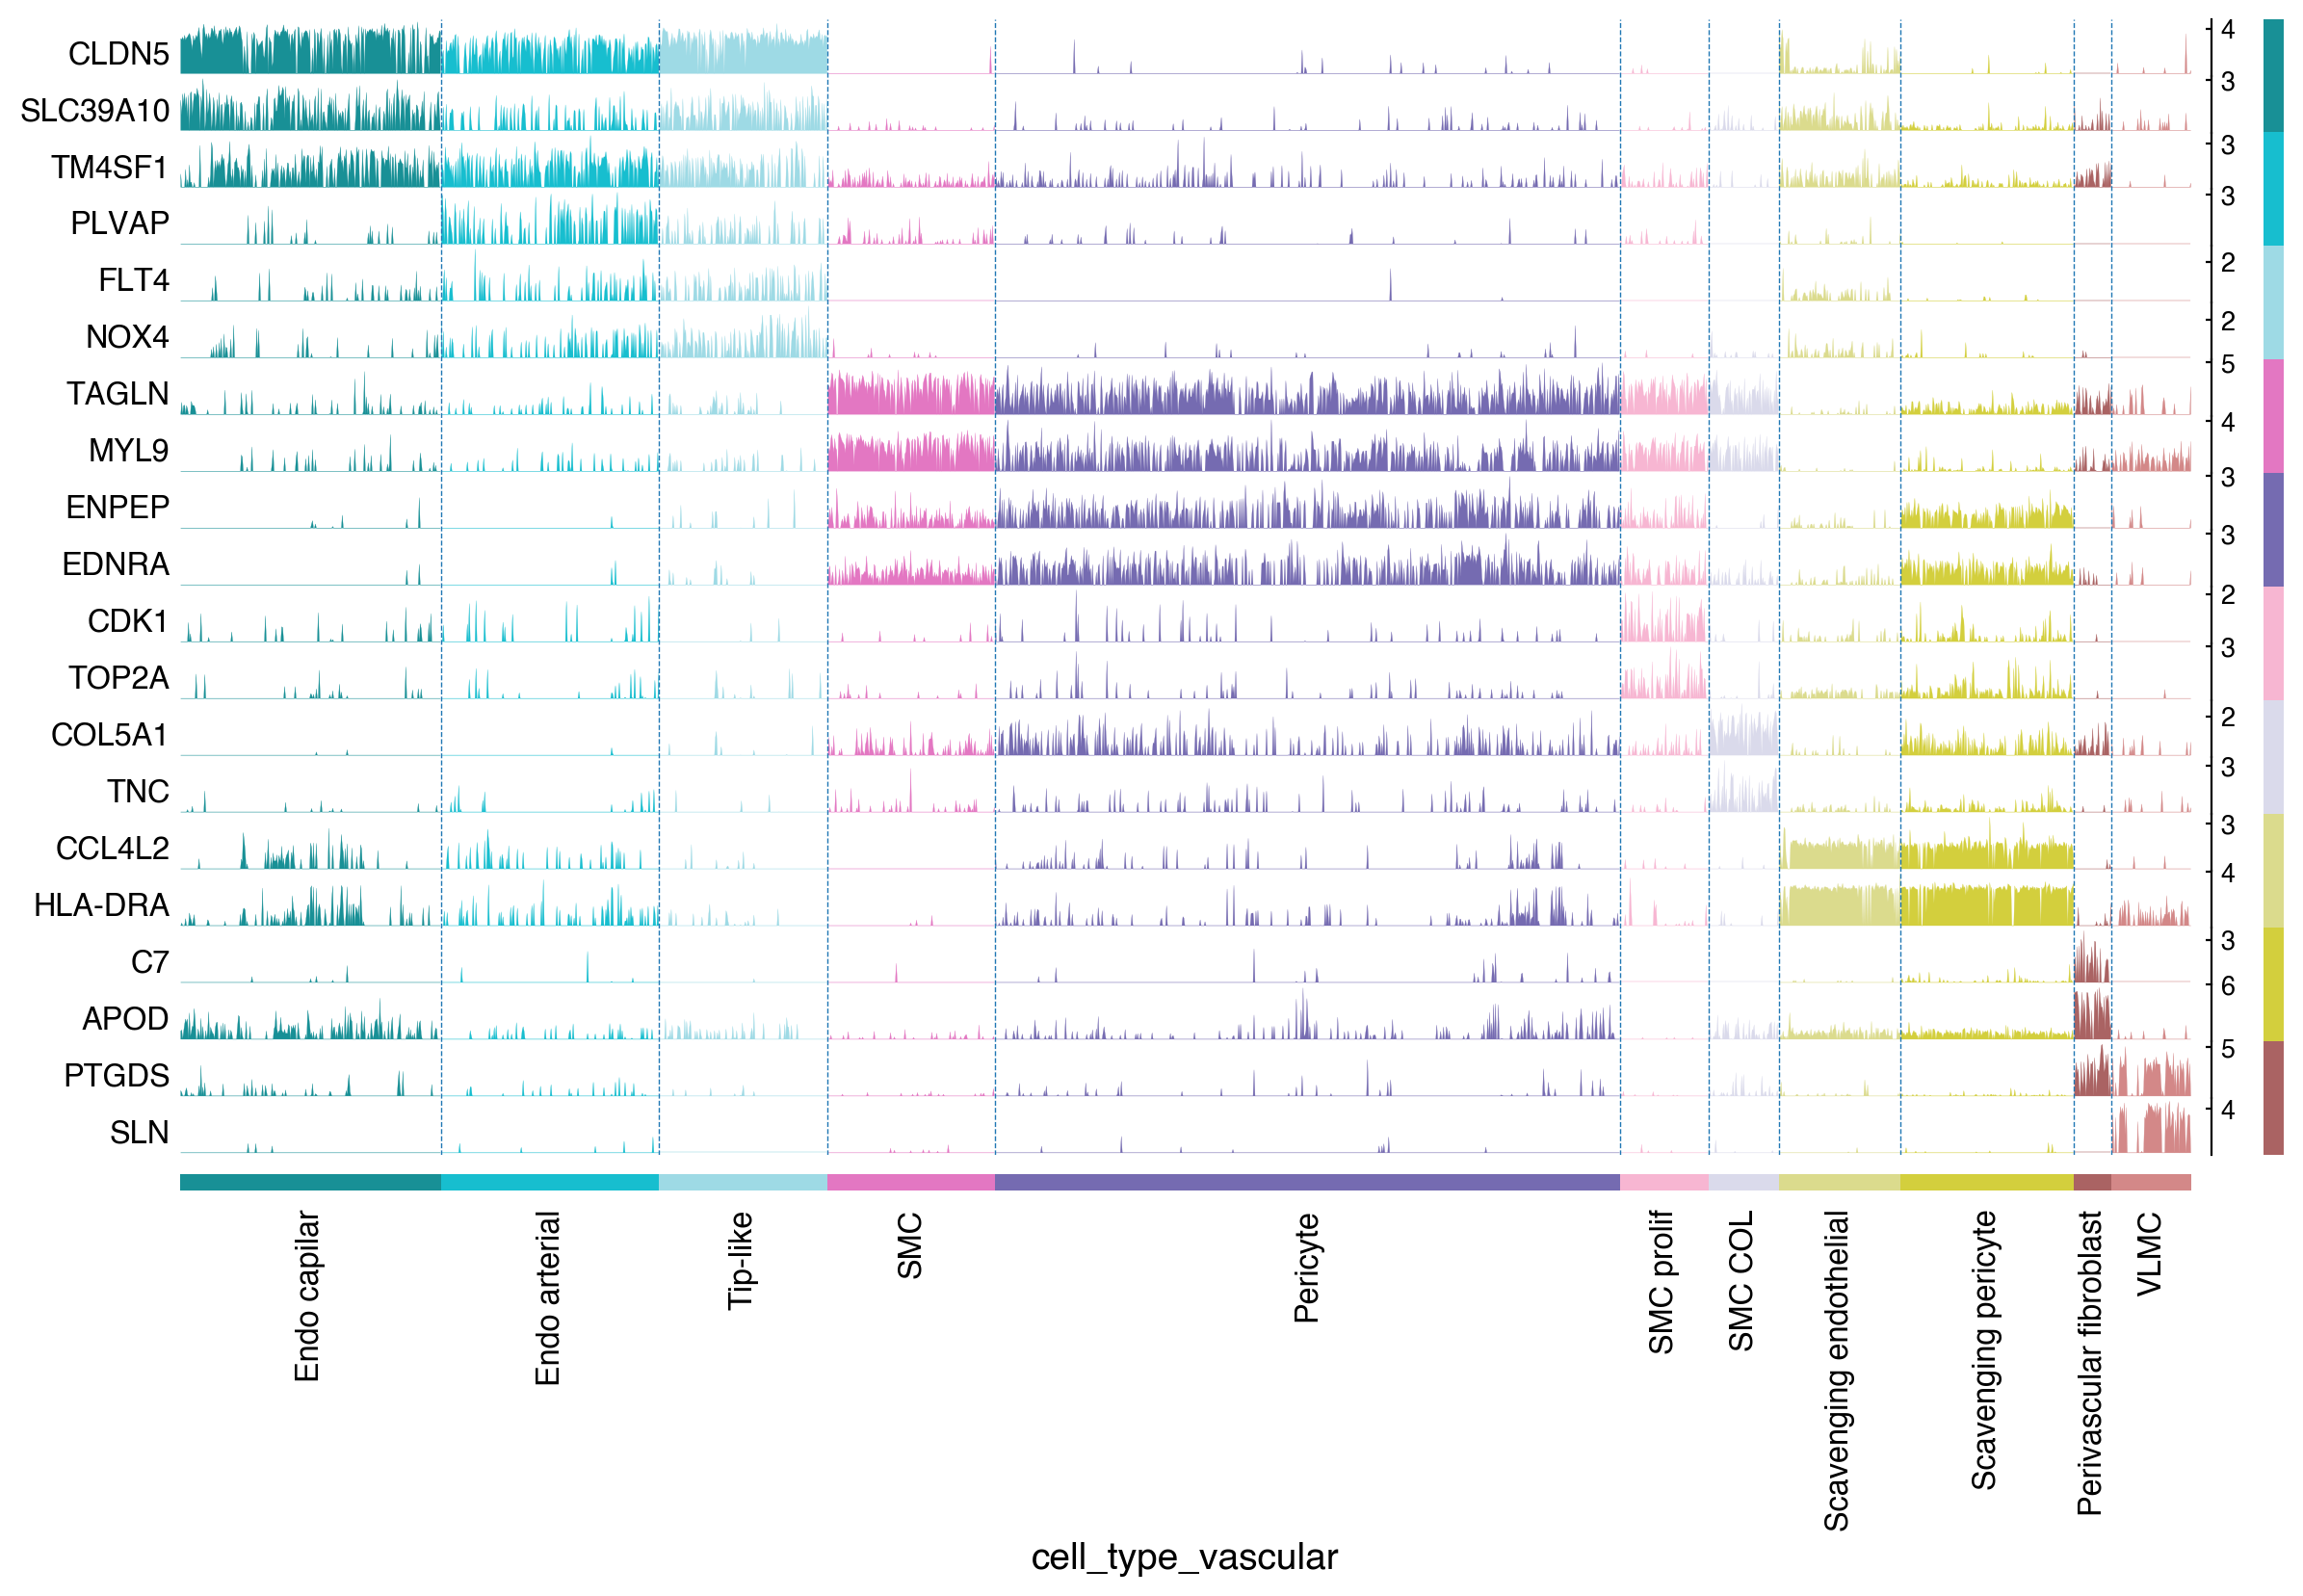

In [ ]:
sc.pl.tracksplot(adata, marker_genes_dict, groupby='cell_type_vascular', figsize= [14, 8], save=True)

Selected UMAP plots showing module acores can be found in notebook 09d_cell_state_annotation_vascular_core_GBmap.ipynb 

Plot was finally organized in Illustrator